# **Lab 3: The Multi-Layer Perception**
### Authors: Will Lahners, Edward Powers, and Nino Castellano
________________________________________________________________

## **Describing the Data**

This dataset from Kaggle, contains US Census data taken from the DP03 and DP05 tables of the 2015 American Community Survey 5-year estimates. We will be utilizing the *acs2015_census_tract_data.csv* file which is data for each census tract in the US, including DC and Puerto Rico. A tract ID, also known as a GEOID (Geographic Identifier), is a numeric code assigned to specific geographic areas by the Census Bureau and other state and federal agencies. These codes uniquely identify various administrative, legal, and statistical geographic entities for which the Census Bureau collects and tabulates data. Our classification task we will be:

- Predicting, for each tract ID, what the child poverty rate will be. 

We are converting this from regression to four levels of classification by quantizing the variable of interest. 

## **Load, Split, and Balance (1.5 points total)**

***[.5 points]** **(1)** Load the data into memory and save it to a pandas data frame. Do not normalize or one-hot encode any of the features until asked to do so later in the rubric. **(2)** Remove any observations that having missing data. **(3)** Encode any string data as integers for now. **(4)** You have the option of keeping the "county" variable or removing it. Be sure to discuss why you decided to keep/remove this variable.*

We've decided to go ahead with the option of removing the "County" and "TractId" variables due to the fact that they both provide unnecessary information needed for our classification task. Including the county would be unnecessary data given that their could be multiple TractId's in the same county. However, the same could be said about the "State" variable as well but there aren't as many states as there is counties so that leads to more computational power when we eventually one-hot encode these features which is another reason why we decided to remove it. There are only 52 states in total compared to the hundreds of counties. Removing the "TractId" variable stems from the fact that in our dataframe each observation is assigned a unique Id value meaning that the TractId will no longer provide any helpful insight besides being extra and redundant.



In [113]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# (1) Load the data into a pandas DataFrame
data = pd.read_csv('./acs2017_census_tract_data.csv')
data = pd.DataFrame(data)

# (2) Remove observations that have missing data
data = data.dropna()

# (3) Encode any string data as integers for now (Credits to ChatGPT)
le = LabelEncoder()
data['State'] = le.fit_transform(data['State'])
data['County'] = le.fit_transform(data['County'])

# (4) Removing "County" and 'TractId' variable
data = data.drop(['TractId', 'County'], axis = 1) 

pd.set_option('display.max_columns', None)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 72718 entries, 0 to 74000
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             72718 non-null  int32  
 1   TotalPop          72718 non-null  int64  
 2   Men               72718 non-null  int64  
 3   Women             72718 non-null  int64  
 4   Hispanic          72718 non-null  float64
 5   White             72718 non-null  float64
 6   Black             72718 non-null  float64
 7   Native            72718 non-null  float64
 8   Asian             72718 non-null  float64
 9   Pacific           72718 non-null  float64
 10  VotingAgeCitizen  72718 non-null  int64  
 11  Income            72718 non-null  float64
 12  IncomeErr         72718 non-null  float64
 13  IncomePerCap      72718 non-null  float64
 14  IncomePerCapErr   72718 non-null  float64
 15  Poverty           72718 non-null  float64
 16  ChildPoverty      72718 non-null  float64
 17

,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,1407,67826.0,14560.0,33018.0,6294.0,10.7,20.8,38.5,15.6,22.8,10.8,12.4,94.2,3.3,0.0,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,0,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,1652,41287.0,3819.0,18996.0,2453.0,22.4,35.8,30.5,24.9,22.9,6.3,15.4,90.5,9.1,0.0,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,0,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,2480,46806.0,9496.0,21236.0,2562.0,14.7,21.1,27.9,19.4,33.3,9.9,9.6,88.3,8.4,0.0,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,0,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,3257,55895.0,4369.0,28068.0,3190.0,2.3,1.7,29.0,16.6,25.8,9.1,19.5,82.3,11.2,0.0,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,0,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,7229,68143.0,14424.0,36905.0,10706.0,12.2,17.9,48.8,13.8,20.5,3.5,13.4,86.9,11.2,0.0,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


*The next two requirements will need to be completed together as they might depend on one another:*

***[.5 points]** Balance the dataset so that about the same number of instances are within each class. Choose a method for balancing the dataset and explain your reasoning for selecting this method. One option is to choose quantization thresholds for the "ChildPoverty" variable that equally divide the data into four classes. Should balancing of the dataset be done for both the training and testing set? Explain.*

We decided to go along the balancing method suggested in the instructions, quantizing the "ChildPoverty" variable into four different classes. This is because using quantization thresholds for balancing the dataset simplifies the classification task by categorizing the poverty rate into discrete levels, such as low, medium, high, and very high. This approach ensures a balanced representation of each category and facilitates clear interpretation of the results, aiding policymakers in understanding poverty severity across different areas. By mitigating imbalanced data challenges and providing meaningful bins, quantization supports the objective of predicting poverty levels for each Tract ID and informs targeted interventions and policies to address disparities effectively.

Also regarding the question of balancing both the training and testing sets, we believe that just balancing the training set would be more effective. While it's essential to balance the training set to ensure the model learns from a diverse set of instances, it's equally important to evaluate the model on an unbiased testing set that reflects the true distribution of classes in real-world data. Therefore, balancing should typically be applied to the training set only.

In [114]:
# Using Quantization thresholds for Balancing
data['ChildPovertyClass'] = pd.qcut(data['ChildPoverty'], q=4, labels=['Low', 'Medium', 'High', 'Extreme'])

# Dropping the orginal Child Poverty Variable since we now have the 4 classes
data.drop(['ChildPoverty'], axis = 1, inplace = True)

# Tranform the Labels into discret values 0, 1, 2, 3
data['ChildPovertyClass'] = le.fit_transform(data['ChildPovertyClass'])

data.head(10)

,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,ChildPovertyClass
0,0,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,1407,67826.0,14560.0,33018.0,6294.0,10.7,38.5,15.6,22.8,10.8,12.4,94.2,3.3,0.0,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6,1
1,0,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,1652,41287.0,3819.0,18996.0,2453.0,22.4,30.5,24.9,22.9,6.3,15.4,90.5,9.1,0.0,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4,0
2,0,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,2480,46806.0,9496.0,21236.0,2562.0,14.7,27.9,19.4,33.3,9.9,9.6,88.3,8.4,0.0,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7,1
3,0,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,3257,55895.0,4369.0,28068.0,3190.0,2.3,29.0,16.6,25.8,9.1,19.5,82.3,11.2,0.0,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1,2
4,0,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,7229,68143.0,14424.0,36905.0,10706.0,12.2,48.8,13.8,20.5,3.5,13.4,86.9,11.2,0.0,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3,1
5,0,3620,1765,1855,3.0,70.7,25.1,0.0,0.0,0.0,2687,44549.0,16126.0,27038.0,4427.0,13.6,25.2,24.6,29.0,8.1,13.1,83.0,4.8,0.0,0.7,3.5,8.0,21.1,1364,84.0,14.1,1.9,0.0,6.1,1
6,0,3420,1459,1961,4.0,78.0,13.7,0.6,0.0,0.0,2538,41250.0,16811.0,19028.0,2587.0,27.0,25.4,35.0,21.6,5.6,12.4,89.0,11.0,0.0,0.0,0.0,0.0,16.4,1418,77.4,17.6,5.0,0.0,16.9,1
7,0,2913,1495,1418,4.2,86.3,7.1,1.5,0.0,0.0,2163,80089.0,13397.0,36631.0,5174.0,12.0,46.0,9.1,30.6,8.3,6.0,89.5,4.6,0.0,0.0,0.7,5.2,24.6,1369,72.7,17.5,8.8,1.0,7.2,1
8,0,11333,5488,5845,1.4,81.8,15.3,0.0,1.0,0.0,8248,64439.0,8677.0,26621.0,2187.0,14.7,36.8,20.2,19.6,9.3,14.0,89.1,8.7,0.0,0.0,0.0,2.2,27.4,4857,70.1,22.5,7.4,0.0,2.2,1
9,0,6167,3111,3056,1.0,86.2,9.7,0.8,0.3,0.0,4710,49469.0,15517.0,26726.0,3839.0,9.4,32.3,12.7,20.1,6.4,28.6,77.2,11.9,0.0,0.0,5.0,5.9,35.6,2781,80.4,14.5,5.0,0.0,6.8,3


***[.5 points]** Assume you are equally interested in the classification performance for each class in the dataset. Split the dataset into 80% for training and 20% for testing. There is no need to split the data multiple times for this lab.*



In [115]:
from sklearn.model_selection import train_test_split

# Handling Target Variable
X = np.array(data.drop(['ChildPovertyClass'], axis=1))
y = data['ChildPovertyClass']

# Test and Train using 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8, stratify = y)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

from collections import Counter

n_samples, n_features = X.shape

print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))

counts = Counter(y_train)
print('Y-Train:')
for value, count in counts.items():
    print(f"\t{value} occurs {count} times")
    
counts = Counter(y_test)
print('Y-Test:')
for value, count in counts.items():
    print(f"\t{value} occurs {count} times")

n_samples: 72718
n_features: 34
Y-Train:
	3 occurs 14537 times
	2 occurs 14583 times
	1 occurs 14518 times
	0 occurs 14536 times
Y-Test:
	2 occurs 3646 times
	0 occurs 3634 times
	3 occurs 3634 times
	1 occurs 3630 times


Here we split the data into training and testing sets, using the 80/20 split. Given that we are equally interested in the classification performance for each class, we stratified the sets to ensure each class is equally represented within both the training and testing data, reducing the biased toward one class over the others.

*Note: You will need to one hot encode the target, but do not one hot encode the categorical data until instructed to do so in the lab.* 

## **Pre-processing and Initial Modeling (2.5 points total)**

*You will be using a two layer perceptron from class for the next few parts of the rubric. There are several versions of the two layer perceptron covered in class, with example code. When selecting an example two layer network from class be sure that you use: **(1)** vectorized gradient computation, **(2)** mini-batching, **(3)** cross entropy loss, and **(4)** proper Glorot initialization, at a minimum. There is no need to use momentum or learning rate reduction (assuming you choose a sufficiently small learning rate). It is recommended to use sigmoids throughout the network, but not required.*

In [116]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka

# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
import numpy as np
from scipy.special import expit
import pandas as pd
import sys

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0,size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_ + 1) # reshape to be W
        
        W2_num_elems = (self.n_hidden + 1)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden + 1)
        return W1, W2
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    def _L2_reg(self, lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2):
        """Compute feedforward step
        """
        A1 = self._add_bias_unit(X, how='column')
        A1 = A1.T
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = -2*(Y_enc-A3)*A3*(1-A3)  # last layer sensitivity
        V1 = A2*(1-A2)*(W2.T @ V2) # back prop the sensitivity 
        
        grad2 = V2 @ A2.T # no bias on final layer
        grad1 = V1[1:,:] @ A1.T # dont back prop sensitivity of bias
        
        
        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C

        return grad1, grad2
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred

In [117]:
from sklearn.metrics import accuracy_score
# just start with the vectorized version and minibatch
class TLPMiniBatch(TwoLayerPerceptronBase):
    def __init__(self, alpha=0.0, decrease_const=0.1, 
                 decrease_iter = 10, shuffle=True, 
                 minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.decrease_iter = decrease_iter
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()

        rho_W1_prev = np.zeros(self.W1.shape)
        rho_W2_prev = np.zeros(self.W2.shape)

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        for i in range(self.epochs):

            # adaptive learning rate
            # \frac{\eta}{1+\epsilon\cdot k}
            eta = self.eta * self.decrease_const**(np.floor(i/self.decrease_iter))

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2)
                
                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, 
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2)

                # momentum calculations
                rho_W1, rho_W2 = eta * grad1, eta * grad2
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))
                rho_W1_prev, rho_W2_prev = rho_W1, rho_W2

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        return self

In [118]:
# to implement the new style of objective function, 
# we just need to update the final layer calculation of the gradient
class TLPMiniBatchCrossEntropy(TLPMiniBatch):
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A3)+(1-Y_enc)*np.log(1-A3))))
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = (A3-Y_enc) # <- this is only line that changed
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        grad2 = V2 @ A2.T
        grad1 = V1[1:,:] @ A1.T
        
        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C

        return grad1, grad2

In [119]:
class TLPBetterInitial(TLPMiniBatchCrossEntropy):             
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_ + 1))
        W1[:,:1] = 0
        
        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden + 1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden + 1)) 
        W2[:,:1] = 0
        
        return W1, W2

In [120]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

def print_result(nn,X_train,y_train,X_test,y_test,title="",color="red"):
    
    print("=================")
    print(title,":")
    yhat = nn.predict(X_train)
    print('Resubstitution acc:',accuracy_score(y_train,yhat))
    print(set(yhat))
    
    yhat = nn.predict(X_test)
    print('Validation acc:',accuracy_score(y_test,yhat))
    print(set(yhat))
    
    if hasattr(nn,'val_score_'):
        plt.plot(range(len(nn.val_score_)), nn.val_score_, color=color,label=title)
        plt.ylabel('Validation Accuracy')
    else:
        plt.plot(range(len(nn.score_)), nn.score_, color=color,label=title)
        plt.ylabel('Resub Accuracy')
        
    plt.xlabel('Epochs')
    plt.tight_layout()
    plt.legend(loc='best')
    plt.grid(True)

**[.5 points]** *Use the example two-layer perceptron network from the class example and quantify performance using accuracy. **Do not** normalize or one-hot encode the data (not yet). Be sure that training converges by graphing the loss function versus the number of epochs.*

Epoch: 100/100

CPU times: total: 3.92 s
Wall time: 16.6 s
Long Run :
Resubstitution acc: 0.25200261285110187
{0, 1, 2, 3}
Validation acc: 0.253025302530253
{0, 1, 2, 3}


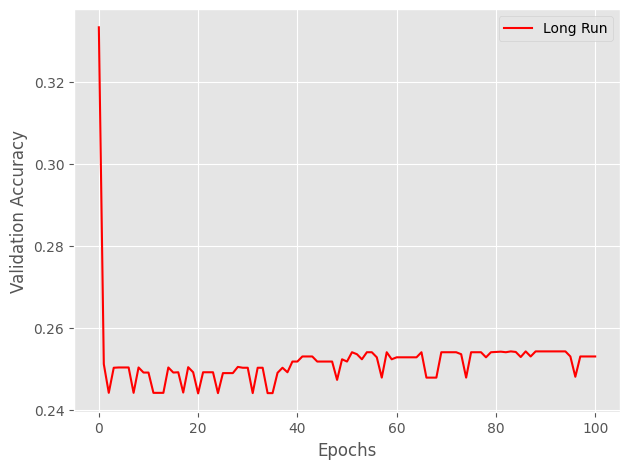

In [122]:
# just for fun, let's look at the output of what happens when we let our system loose
# these values have been hand tuned
vals = { 'n_hidden':30, 
         'C':0.1, 'epochs':100, 'eta':0.0001, 
         'alpha':0.0001, 'decrease_const':1, 'minibatches': 50,
         'shuffle':True,'random_state':1 }

nn_long_sigmoid = TLPBetterInitial(**vals)

%time nn_long_sigmoid.fit(X_train, y_train, print_progress=1, XY_test=(X_test,y_test))
evals1=nn_long_sigmoid.val_score_
print_result(nn_long_sigmoid,X_train,y_train,X_test,y_test,title="Long Run",color="red")

**[.5 points]** Now **(1)** normalize the continuous numeric feature data. Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Be sure that training converges by graphing the loss function versus the number of epochs.  

In [127]:
# Normalizing the continuous numeric feature data
data_normalized = data.drop(['State', 'ChildPovertyClass'], axis=1)

data_normalized = (data_normalized-data_normalized.mean()) / data_normalized.std()
data_normalized['State'] = data['State']
data_normalized['ChildPovertyClass'] = data['ChildPovertyClass']

data_normalized.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,State,ChildPovertyClass
0,-1.186424,-1.168560,-1.167630,-0.644718,0.815033,-0.373213,-0.161520,-0.394912,-0.143895,-1.146470,0.219789,0.795775,0.148405,0.683473,-0.430194,0.195906,-0.407542,-0.109663,0.258579,-0.068793,1.224503,-1.179501,-0.461944,-0.461120,-0.758737,-0.666355,-0.222718,-1.071600,-0.667537,0.984049,-0.439008,-0.379141,-0.514748,0,1
1,-1.037121,-0.924913,-1.115167,-0.701033,-0.644414,1.911175,-0.161520,-0.417145,-0.143895,-0.984498,-0.650027,-0.959460,-0.736592,-0.600709,0.511180,-0.336052,0.759391,-0.091778,-0.498506,0.326333,0.977185,-0.043964,-0.461944,-0.556166,-0.557595,-1.223276,-0.546859,-1.097490,-0.453898,0.118706,0.745607,-0.379141,-0.750069,0,0
2,-0.483286,-0.592172,-0.362014,-0.402130,0.002052,0.613754,-0.028358,-0.450495,0.250117,-0.437100,-0.469141,-0.031756,-0.595214,-0.564266,-0.108357,-0.508938,0.069270,1.768236,0.107162,-0.437578,0.830131,-0.181012,-0.461944,-0.366074,-0.436910,-0.825475,-0.420021,-0.535045,-0.780640,0.970092,-0.360034,1.170801,-0.495138,0,1
3,-0.080580,-0.166700,0.006116,-0.332820,0.619134,-0.285174,-0.050552,-0.506078,-0.143895,0.076582,-0.171249,-0.869582,-0.164014,-0.354304,-1.106052,-0.435794,-0.282065,0.426880,-0.027431,0.866339,0.429075,0.367178,-0.461944,-0.271028,0.407884,-0.666355,-0.025415,-0.207399,-0.466465,0.774692,-0.439008,-0.379141,-0.220597,0,2
4,2.521029,2.608869,2.358053,-0.709697,0.527715,0.145755,-0.161520,-0.183697,-0.143895,2.702506,0.230179,0.773551,0.393732,2.158560,-0.309505,0.880801,-0.633400,-0.521012,-0.969581,0.062916,0.736551,0.367178,-0.461944,-0.404092,-0.638052,-1.037635,-0.715976,2.415559,-1.019413,1.388806,-0.439008,-0.379141,-0.965780,0,1


Epoch: 100/100

CPU times: total: 12.4 s
Wall time: 30.8 s
Long Run :
Resubstitution acc: 0.674803176676866
{0, 1, 2, 3}
Validation acc: 0.6764301430143014
{0, 1, 2, 3}


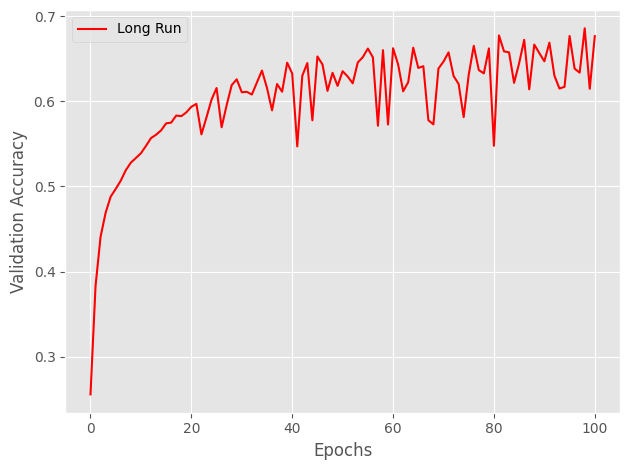

In [132]:
# Splitting test and train with normalized data
X = np.array(data_normalized.drop(['ChildPovertyClass'], axis=1))
y = data_normalized['ChildPovertyClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, 
                                                    stratify=data_normalized['ChildPovertyClass'])

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Running model with normalized data
vals = { 'n_hidden':30, 
         'C':0.1, 'epochs':100, 'eta':0.0001, 
         'alpha':0.001, 'decrease_const': 1, 'minibatches':50,
         'shuffle':True,'random_state':1 }

nn_long_sigmoid = TLPBetterInitial(**vals)

%time nn_long_sigmoid.fit(X_train, y_train, print_progress=1, XY_test=(X_test,y_test))

evals2=nn_long_sigmoid.val_score_

print_result(nn_long_sigmoid,X_train,y_train,X_test,y_test,title="Long Run",color="red")


**[.5 points]** Now **(1)** normalize the continuous numeric feature data AND **(2)** one hot encode the categorical data. Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Be sure that training converges by graphing the loss function versus the number of epochs.

In [128]:
# One Hot encoding data except state 
one_hot = pd.get_dummies(data_normalized['State'], columns=['State'], dtype=int)
data_one_hot = data_normalized.join(one_hot)
data_one_hot.drop(['State'], axis=1, inplace=True)

data_one_hot.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,ChildPovertyClass,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,-1.186424,-1.168560,-1.167630,-0.644718,0.815033,-0.373213,-0.161520,-0.394912,-0.143895,-1.146470,0.219789,0.795775,0.148405,0.683473,-0.430194,0.195906,-0.407542,-0.109663,0.258579,-0.068793,1.224503,-1.179501,-0.461944,-0.461120,-0.758737,-0.666355,-0.222718,-1.071600,-0.667537,0.984049,-0.439008,-0.379141,-0.514748,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-1.037121,-0.924913,-1.115167,-0.701033,-0.644414,1.911175,-0.161520,-0.417145,-0.143895,-0.984498,-0.650027,-0.959460,-0.736592,-0.600709,0.511180,-0.336052,0.759391,-0.091778,-0.498506,0.326333,0.977185,-0.043964,-0.461944,-0.556166,-0.557595,-1.223276,-0.546859,-1.097490,-0.453898,0.118706,0.745607,-0.379141,-0.750069,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.483286,-0.592172,-0.362014,-0.402130,0.002052,0.613754,-0.028358,-0.450495,0.250117,-0.437100,-0.469141,-0.031756,-0.595214,-0.564266,-0.108357,-0.508938,0.069270,1.768236,0.107162,-0.437578,0.830131,-0.181012,-0.461944,-0.366074,-0.436910,-0.825475,-0.420021,-0.535045,-0.780640,0.970092,-0.360034,1.170801,-0.495138,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.080580,-0.166700,0.006116,-0.332820,0.619134,-0.285174,-0.050552,-0.506078,-0.143895,0.076582,-0.171249,-0.869582,-0.164014,-0.354304,-1.106052,-0.435794,-0.282065,0.426880,-0.027431,0.866339,0.429075,0.367178,-0.461944,-0.271028,0.407884,-0.666355,-0.025415,-0.207399,-0.466465,0.774692,-0.439008,-0.379141,-0.220597,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.521029,2.608869,2.358053,-0.709697,0.527715,0.145755,-0.161520,-0.183697,-0.143895,2.702506,0.230179,0.773551,0.393732,2.158560,-0.309505,0.880801,-0.633400,-0.521012,-0.969581,0.062916,0.736551,0.367178,-0.461944,-0.404092,-0.638052,-1.037635,-0.715976,2.415559,-1.019413,1.388806,-0.439008,-0.379141,-0.965780,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Epoch: 100/100

CPU times: total: 10.5 s
Wall time: 36.1 s
Long Run :
Resubstitution acc: 0.7134458692886857
{0, 1, 2, 3}
Validation acc: 0.7102585258525853
{0, 1, 2, 3}


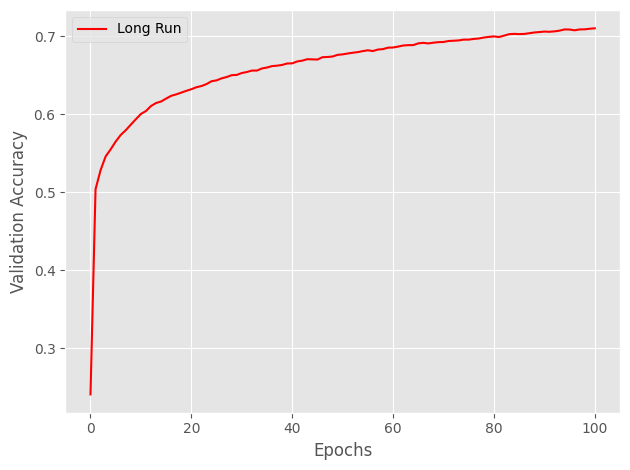

In [131]:
# Splitting test and train with one hot data
X = np.array(data_one_hot.drop(['ChildPovertyClass'], axis=1))
y = data_one_hot['ChildPovertyClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, 
                                                    stratify=data_one_hot['ChildPovertyClass'])

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Running model with one hot data
vals = { 'n_hidden':30, 
         'C':0.1, 'epochs':100, 'eta':0.0001, 
         'alpha':0.001, 'decrease_const': 1, 'minibatches':50,
         'shuffle':True,'random_state':1 }

nn_long_sigmoid = TLPBetterInitial(**vals)

%time nn_long_sigmoid.fit(X_train, y_train, print_progress=1, XY_test=(X_test,y_test))

evals3=nn_long_sigmoid.val_score_

print_result(nn_long_sigmoid,X_train,y_train,X_test,y_test,title="Long Run",color="red")

**[1 points]** Compare the performance of the three models you just trained. Are there any meaningful differences in performance? Explain, in your own words, why these models have (or do not have) different performances.  

- Use one-hot encoding and normalization on the dataset for the remainder of this lab assignment.

In [140]:
# Adpopted for class code on Jupyter notebooks
#===================================================
from sklearn.model_selection import cross_val_score
mean_score1= np.mean(evals1)
mean_score2= np.mean(evals2)
mean_score3= np.mean(evals3)
print('Mean Score for Model 1 (No Normalization or One Hot Encoding):', np.mean(evals1))
print('Mean Score for Model 2 (Normalization but no One Hot Encoding):', np.mean(evals2))
print('Mean Score for Model 3 (Normalization and One Hot Encoding):', np.mean(evals3))
print()
# t = 2.26 / np.sqrt(10)
t= 1.96

# model 1 and 2
e_list = [(1-evals1[i]) - (1-evals2[i])for i in range(len(evals1))]
# e = (1-evals1) - (1-evals2)
stdtot = np.std(e_list)
dbar = np.mean(e_list)
print('Interval for Model 1 and 2: (', dbar-t*stdtot, ",", dbar+t*stdtot, ")")

# # model 2 and 3
e_list = [(1-evals2[i]) - (1-evals3[i])for i in range(len(evals1))]
# e = (1-evals1) - (1-evals2)
stdtot = np.std(e_list)
dbar = np.mean(e_list)
print('Interval for Model 2 and 3: (', dbar-t*stdtot, ",", dbar+t*stdtot, ")")

# # model 3 and 1
e_list = [(1-evals3[i]) - (1-evals1[i])for i in range(len(evals1))]
# e = (1-evals1) - (1-evals2)
stdtot = np.std(e_list)
dbar = np.mean(e_list)
print('Interval for Model 3 and 1: (', dbar-t*stdtot, ",", dbar+t*stdtot, ")")

#===================================================

Mean Score for Model 1 (No Normalization or One Hot Encoding): 0.25179448637933105
Mean Score for Model 2 (Normalization but no One Hot Encoding): 0.6046057576054634
Mean Score for Model 3 (Normalization and One Hot Encoding): 0.6598794780468146

Interval for Model 1 and 2: ( 0.22150648939350231 , 0.4841160530587629 )
Interval for Model 2 and 3: ( 0.0012475400152531582 , 0.10929990086744898 )
Interval for Model 3 and 1: ( -0.5358045401848972 , -0.28036544315006995 )


Here we can identify the difference between the different models we just trained by first looking at accuracy between them. First off it is clear that we understand the Model 1 has neither normalization nor one hot encoding, Model 2 has only normalization, and Model 3 has both normalization and hot encoding. It is clear that the most accurate of these models is the one with normalization and one hot encoding combined. However, with just normalization, it does not fall too far behind, given that there is no major difference between the mean scores for the accuracy in Model 2 and 3. Although there is a significant difference when the model is run without one hot encoding and normalization, hindering the accuracy to 0.25%. It is also worth noting that the comparison intervals for all of the models do not contain 0, which tells us we can reject the null hypothesis and gives us the confidence to say that there is a statistical difference between all three of the models. In the case that there was a 0 in one of these intervals, then we couldn't confidently say that there is a significance difference.

## **Modeling (5 points total)**

**[1 points]** *Add support for a third layer in the multi-layer perceptron. Add support for saving (and plotting after training is completed) the average magnitude of the gradient for each layer, for each epoch (like we did in the flipped module for back propagation). For magnitude calculation, you are free to use either the average absolute values or the L1/L2 norm.
Quantify the performance of the model and graph the magnitudes for each layer versus the number of epochs.*